In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression,RidgeCV, ElasticNet,Lasso
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [2]:
def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [3]:
df = pd.read_csv('csv/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

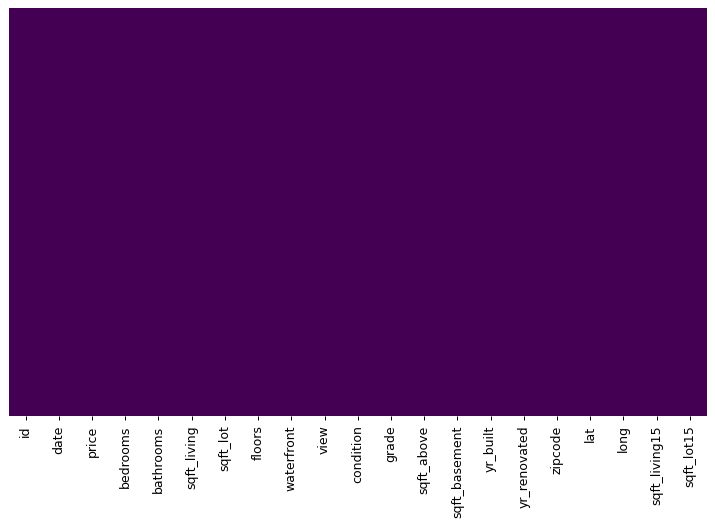

In [7]:
resizeplot(10,6,90)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [10]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['grade'] = df['grade'].astype(int)

In [11]:
df.drop('date',inplace=True,axis=1)

In [12]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [13]:
corre = df.corr()

<AxesSubplot:>

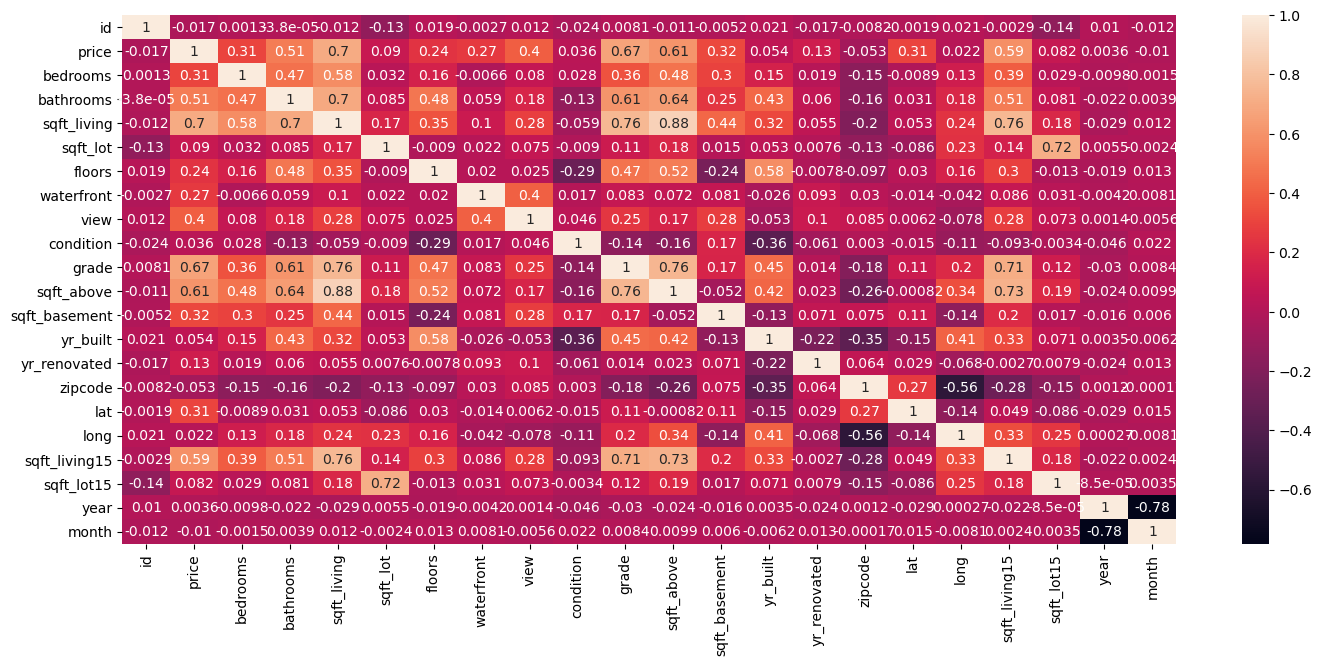

In [14]:
resizeplot(17,7,100)
sns.heatmap(corre,annot=True)

In [15]:
#df[df['bedrooms']>=30] = df[df['bedrooms']==3]

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

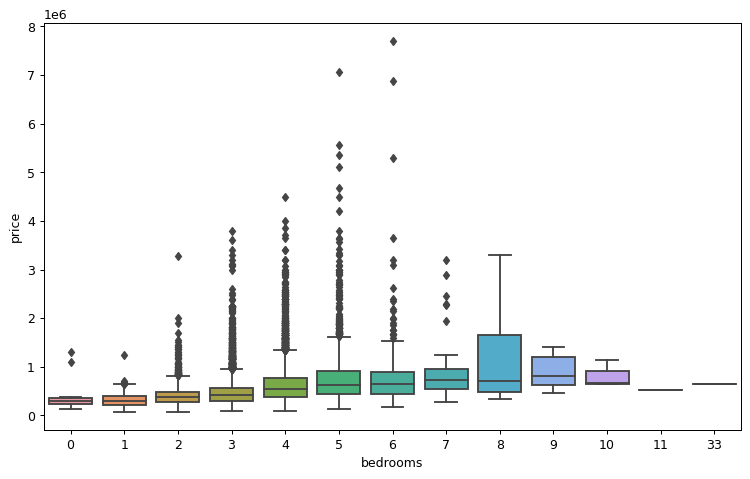

In [16]:
resizeplot(10,6,90)
sns.boxplot(x='bedrooms',y='price',data=df)

In [17]:
df[(df['bedrooms']==0)&(df['price']>300000)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
875,6306400140,1095000.0,0,0,3064,4764,3,0,2,3,...,0,1990,0,98102,47.6362,-122.322,2360,4000,2014,6
3119,3918400017,380000.0,0,0,1470,979,3,0,2,3,...,0,2006,0,98133,47.7145,-122.356,1470,1399,2015,2
6994,2954400190,1295650.0,0,0,4810,28008,2,0,0,3,...,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,6
8477,2569500210,339950.0,0,2,2290,8319,2,0,0,3,...,0,1985,0,98042,47.3473,-122.151,2500,8751,2014,11
9773,3374500520,355000.0,0,0,2460,8049,2,0,0,3,...,0,1990,0,98031,47.4095,-122.168,2520,8050,2015,4
12653,7849202299,320000.0,0,2,1490,7111,2,0,0,3,...,0,1999,0,98065,47.5261,-121.826,1500,4675,2015,2


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

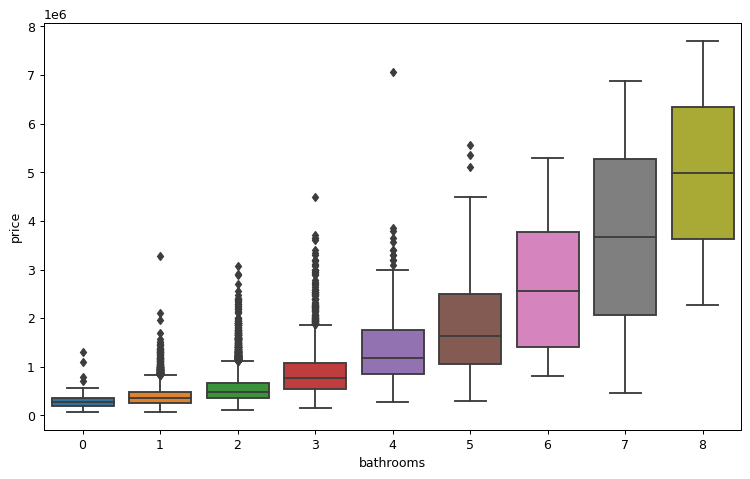

In [18]:
resizeplot(10,6,90)
sns.boxplot(x='bathrooms',y='price',data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

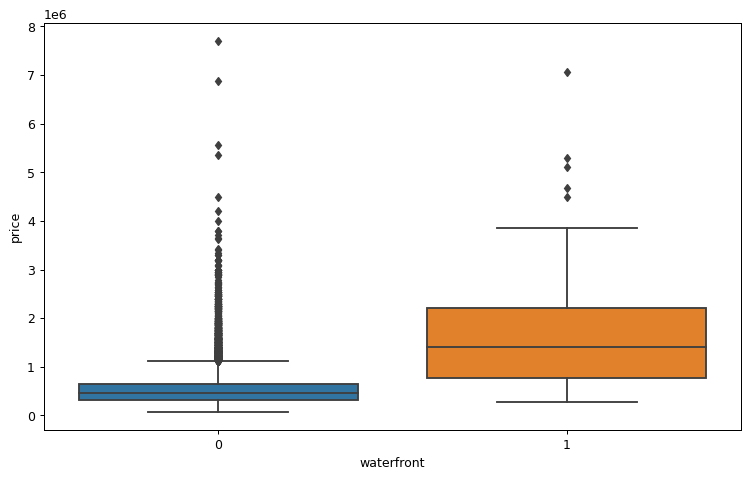

In [19]:
resizeplot(10,6,90)
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

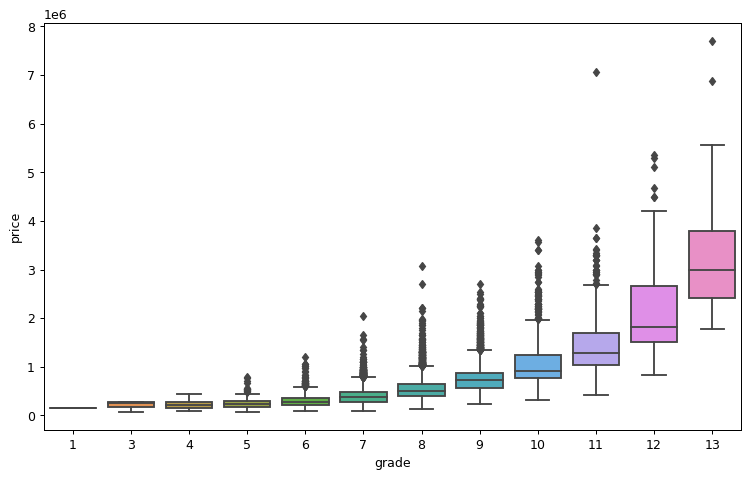

In [20]:
resizeplot(10,6,90)
sns.boxplot(x='grade',y='price',data=df)

In [21]:
df['floors'] = np.around(df['floors'])

<AxesSubplot:xlabel='floors', ylabel='price'>

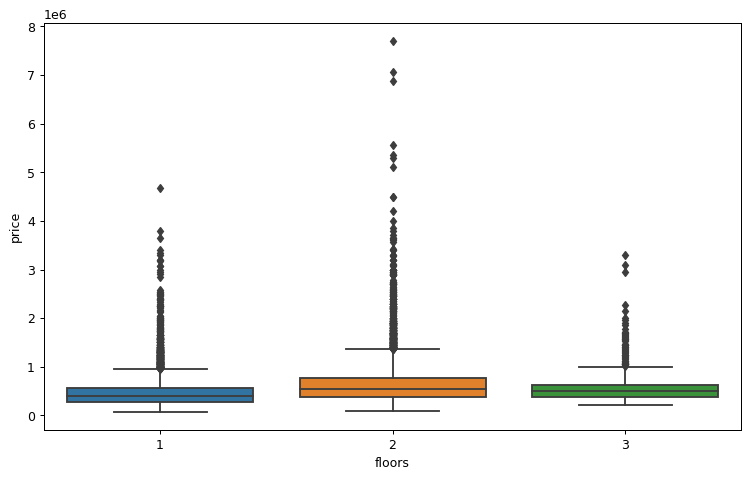

In [22]:
resizeplot(10,6,90)
sns.boxplot(x='floors',y='price',data=df)

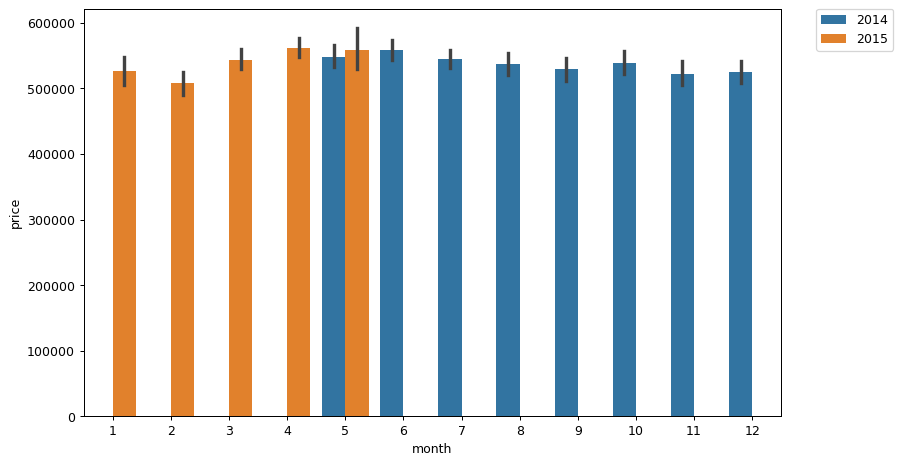

In [23]:
resizeplot(10,6,90)
sns.barplot(x='month',y='price',data=df,hue='year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='year', ylabel='price'>

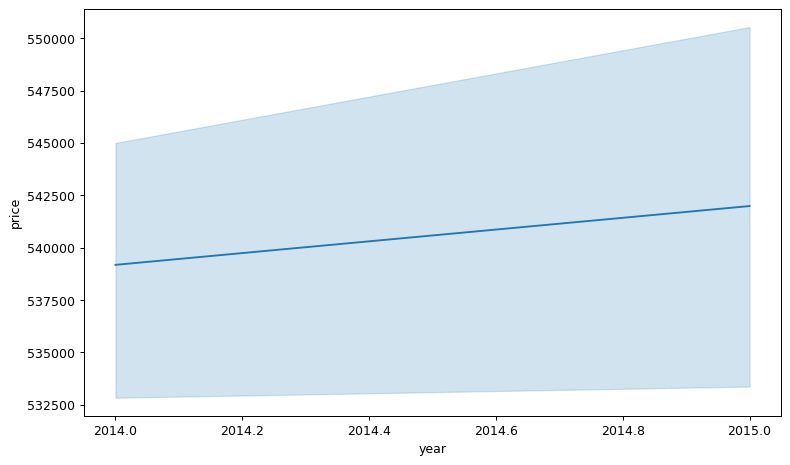

In [24]:
resizeplot(10,6,90)
sns.lineplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

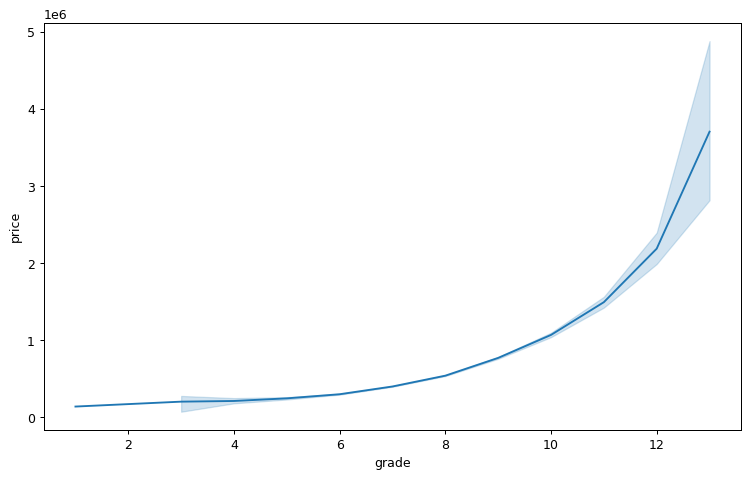

In [25]:
resizeplot(10,6,90)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

In [26]:
#CRIANDO OS MODELOS

In [27]:
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


In [28]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [29]:
X = df.drop(['price','id'],axis=1).values
y=df['price'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
#ELASTIC NET

In [35]:
model_elastic = ElasticNet()
#param_grid_en = {'alpha':[0.1,1,5,10,150],'l1_ratio':[.1,.7,.99,1]}
#grid_model_en = GridSearchCV(model_elastic,param_grid = param_grid_en,scoring='neg_mean_squared_error',
#                            cv=5,verbose=2,n_jobs=-1)
#grid_model_en.fit(scaled_X_train,y_train)

In [66]:
#grid_model_en.best_params_

{'alpha': 1, 'l1_ratio': 0.99}

In [36]:
en =ElasticNet(alpha=1,l1_ratio=0.99)
en.fit(scaled_X_train,y_train)

ElasticNet(alpha=1, l1_ratio=0.99)

In [37]:
pred_en = en.predict(scaled_X_test)

mae_en = mean_absolute_error(y_test,pred_en)
mse_en = mean_squared_error(y_test,pred_en)
rmse_en = np.sqrt(mse_en)
score_en = r2_score(y_test,pred_en)

print('Score: ',score_en)
print('\n')
print('Mae: ', mae_en)
print('Mse: ',mse_en)
print('Rmse: ', rmse_en)

Score:  0.711611277007248


Mae:  125106.72845923937
Mse:  39684533275.43921
Rmse:  199209.77203801827


In [63]:
#SVR

In [73]:
#svr = SVR()
#param_grid_svr = {'C':[0.001,0.01,0.1,0,3],'kernel':['linear','rbf','poly','sigmoid'],
#              'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,1]}
#grid_model_svr = GridSearchCV(svr,param_grid_svr,scoring='neg_mean_squared_error',
                              cv=3,verbose=2,n_jobs=-1)
#grid_model_svr.fit(scaled_X_train,y_train)


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/home/italosimoesrj/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.41408660e+11 -1.41425086e+11 -1.41424976e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41424977e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41424976e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41424977e+11 -1.41424624e+11
 -1.41408656e+11 -1.41425087e+11 -1.41424972e+11 -1.41424622e+11
 -1.41408656e+11 -1.41425087e+11 -1.41424972e+11 -1.41424622e+11
 -1.41408623e+11 -1.41425029e+11 -1.41424917e+11 -1.41424556e+11
 -1.41408623e+11 -1.41425029e+11 -1.41424919e+11 -1.41424557e+11
 -1.41408660e+11 -1.41425086e+11 -1.41423014e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41423030e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41423014e+11 -1.41424624e+11
 -1.41408660e+11 -1.41425086e+11 -1.41423031e+11 -1.41424624e+11
 -1.41408656e+11 -1.41425087e+11 -1.4142

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 3], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [74]:
grid_model_svr.best_params_

{'C': 3, 'degree': 2, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
svr = SVR(C=3,degree=2,epsilon=0,gamma='scale',kernel='linear')
svr.fit(scaled_X_train,y_train)

SVR(C=3, degree=2, epsilon=0, kernel='linear')

In [39]:
pred_svr = svr.predict(scaled_X_test)

mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
score_svr = r2_score(y_test,pred_svr)

print('Score: ',score_svr)
print('\n')
print('Mae: ', mae_svr)
print('Mse: ',mse_svr)
print('Rmse: ', rmse_svr)

Score:  0.25710564978442096


Mae:  178921.33643038417
Mse:  102228045727.04076
Rmse:  319731.2085596912


In [76]:
#RANDOM FOREST

In [79]:
#rfr = RandomForestRegressor()
#param_grid_rfr = {'n_estimators':[10,20,50,150],'criterion':['mae','mse'],'max_depth':[5,10,15],
#                  'max_features':['auto', 'sqrt', 'log2']}
#grid_rfr = GridSearchCV(rfr,param_grid_rfr,n_jobs=-1,cv=5,verbose=2)
#grid_rfr.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 150]},
             verbose=2)

In [80]:
grid_rfr.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 150}

In [40]:
rfr = RandomForestRegressor(criterion='mae',max_depth=15,max_features='auto',n_estimators=50)
rfr.fit(scaled_X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=50)

In [41]:
y_pred_rfr = rfr.predict(scaled_X_test)

score_rfr = r2_score(y_test,y_pred_rfr)

mae_rfr = mean_absolute_error(y_test,y_pred_rfr)
mse_rfr = mean_squared_error(y_test,y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print('Mean Absolute_error: ', mae_rfr)
print('Mean_Squared_Error: ', mse_rfr)
print('Root_Mean_Squared_Error: ', rmse_rfr)
print('\n')
print('Score_R2_js: ', score_rfr)

Mean Absolute_error:  73057.38636027143
Mean_Squared_Error:  19044313526.623142
Root_Mean_Squared_Error:  138001.1359613505


Score_R2_js:  0.8616043882865684


In [ ]:
# DECISION TREE REGRESSOR

In [84]:
#dtr = DecisionTreeRegressor()
#param_dtr_grid = {'criterion':['mse','friedman_mse', 'mae', 'poisson'],
#                  'splitter':['best'],'max_features':['auto', 'sqrt', 'log2']}
#grid_dtr = GridSearchCV(dtr,param_grid=param_dtr_grid,n_jobs=-1,cv=5)
#grid_dtr.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best']})

In [85]:
grid_dtr.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}

In [42]:
dtr = DecisionTreeRegressor(criterion='mae',max_features='auto',splitter='best')
dtr.fit(scaled_X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_features='auto')

In [43]:
pred_dtr = dtr.predict(scaled_X_test)

mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

score_dtr = r2_score(y_test,pred_dtr)

print('Score_knnr: ',score_dtr)
print('\n')
print('Mean_Absolute_error: ',mae_dtr)
print('Mean_Squared_Error: ',mse_dtr)
print('Root_Mean_Squared_Error: ',rmse_dtr)

Score_knnr:  0.7293020416117595


Mean_Absolute_error:  104575.58528685996
Mean_Squared_Error:  37250146350.28424
Root_Mean_Squared_Error:  193002.96979654027


In [44]:
# KNN REGRESSOR

In [45]:
#knnr = KNeighborsRegressor()
#param_knn_grid = {'n_neighbors':[5,15,20,50],'leaf_size':[100,200,400,500],
#                  'algorithm':['auto','ball_tree','kd_tree','brute']}
#grid_knnr = GridSearchCV(knnr,param_knn_grid,n_jobs=-1,cv=3)
#grid_knnr.fit(scaled_X_train,y_train)

In [89]:
grid_knnr.best_params_

{'algorithm': 'auto', 'leaf_size': 100, 'n_neighbors': 5}

In [46]:
knnr = KNeighborsRegressor(algorithm= 'auto', leaf_size= 100, n_neighbors= 5)
knnr.fit(scaled_X_train,y_train)

KNeighborsRegressor(leaf_size=100)

In [47]:
 pred_knnr = knnr.predict(scaled_X_test)

mae_knr = mean_absolute_error(y_test,pred_knnr)
mse_knr = mean_squared_error(y_test,pred_knnr)
rmse_knr = np.sqrt(mse_knr)

score_knr = r2_score(y_test,pred_knnr)

print('Score_knnr: ',score_knr)
print('\n')
print('Mean_Absolute_error: ',mae_knr)
print('Mean_Squared_Error: ',mse_knr)
print('Root_Mean_Squared_Error: ',rmse_knr)

Score_knnr:  0.7818595341251353


Mean_Absolute_error:  96530.9250771129
Mean_Squared_Error:  30017826241.24471
Root_Mean_Squared_Error:  173256.533040589


In [ ]:
# XGB REGRESSOR

In [93]:
#xgb = XGBRegressor()
#kfold = KFold(n_splits=5, shuffle=True)
#param_grid_x = {'n_estimators':[100,200,300,400],'eval_metric':['mae'],'max_depth':[2,4,6,10]}
#grid_xgb = GridSearchCV(xgb,param_grid_x,n_jobs=-1,cv=kfold,verbose=2)

#grid_xgb.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                  

In [94]:
grid_xgb.best_params_

{'eval_metric': 'mae', 'max_depth': 4, 'n_estimators': 300}

In [48]:
xgb = XGBRegressor(eval_metric= 'mae', max_depth= 4, n_estimators= 300)
xgb.fit(scaled_X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
pred_xgb = xgb.predict(scaled_X_test)

mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
score_xgb = r2_score(y_test,pred_xgb)

print('Score: ',score_xgb)
print('\n')
print('Mean_Absolute_error: ',mae_xgb)
print('Mean_Squared_Error: ',mse_xgb)
print('Root_Mean_Squared_Error: ',rmse_xgb)

Score:  0.8923301669319312


Mean_Absolute_error:  67197.59564047077
Mean_Squared_Error:  14816207197.041292
Root_Mean_Squared_Error:  121721.84354930422


In [96]:
#SVR

In [50]:
svr = SVR()
param_grid_svr = {'C':[0.001,0.01,0.1,0,5,1],'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,5,1,2]}
grid_svr = GridSearchCV(svr, param_grid_svr,n_jobs=-1,cv=3,verbose=1)
grid_svr.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/home/italosimoesrj/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.05891796 -0.05904112 -0.05904031 -0.05891796 -0.05904112 -0.05904032
 -0.05891796 -0.05904112 -0.05904031 -0.05891796 -0.05904112 -0.05904032
 -0.05891792 -0.05904113 -0.05904028 -0.05891792 -0.05904113 -0.05904028
 -0.05891683 -0.05903884 -0.05903801 -0.05891683 -0.05903884 -0.05903801
 -0.05891767 -0.05904068 -0.05903985 -0.05891767 -0.05904068 -0.05903985
 -0.05891753 -0.05904022 -0.05903939 -0.05891753 -0.05904022 -0.05903939
 -0.05891796 -0.05904112 -0.05902577 -0.05891796 -0.05904112 -0.05902586
 -0.05891796 -0.05904112 -0.05902577 -0.05891796 -0.05904112 -0.05902586
 -0.05891792 -0.05904113 -0.05902575 -0.05891792 -0.05904113 -0.05902584
 -0.05891683 -0.05903884 -0.05902339 -0.05891683 -0.05903884 -0.05902349
 -0.05891767 -0.05904068 -0.05902523 -0.05891767 -0.05904068 -0.05902533
 -0.05891753 -0.0

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [51]:
grid_svr.best_params_

{'C': 5, 'degree': 2, 'epsilon': 5, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
grid_pred_svr = grid_svr.predict(scaled_X_test)

mae_svr = mean_absolute_error(y_test,grid_pred_svr)
mse_svr = mean_squared_error(y_test,grid_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test,grid_pred_svr))
score_svr = r2_score(y_test,grid_pred_svr)

print('Score: ',score_svr)
print('\n')
print('Mean_Absolute_error: ',mae_svr)
print('Mean_Squared_Error: ',mse_svr)
print('Root_Mean_Squared_Error: ',rmse_svr)

Score:  0.3625007890601337


Mean_Absolute_error:  161048.02152526137
Mean_Squared_Error:  87724854103.41512
Root_Mean_Squared_Error:  296183.8180985165


### O algorítmo vencedor foi Xgboost (pra variar,rsrs), vamos aplicar ao conjunto de dados.

In [54]:
xgb_final = XGBRegressor(eval_metric= 'mae', max_depth= 4, n_estimators= 300)
xgb_final.fit(X,y)
xgb_final_pred = xgb_final.predict(X)

In [55]:
df['predicted prices'] = xgb_final_pred

In [56]:
df['price diferences'] = df['price']-df['predicted prices']

In [58]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'predicted prices',
       'price diferences'],
      dtype='object')

In [59]:
df = df.reindex(columns=['id', 'price','predicted prices', 'price diferences','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                         'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                         'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                         'sqft_living15', 'sqft_lot15', 'year', 'month'])

In [60]:
df.head()

,id,price,predicted prices,price diferences,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,213454.968750,8445.031250,3,1,1180,5650,1,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,525843.312500,12156.687500,3,2,2570,7242,2,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,195259.390625,-15259.390625,2,1,770,10000,1,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,523170.906250,80829.093750,4,3,1960,5000,1,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,480977.187500,29022.812500,3,2,1680,8080,1,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [61]:
#import joblib

In [ ]:
#joblib.dump(xgb_final,'final_model.pkl')